In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [30]:
data = pd.read_csv('../mockData/mockData.csv')
data.head()

,Unnamed: 0,Bios,Year,Major_Dept,Ambition,Goals,Music,Sports,Friday_Nights,School_balance,Movie_Genres,Social_Style,Transfer
0,0,Infuriatingly humble internet practitioner. Cr...,1,1,1,2,5,9,2,2,8,3,2
1,1,Communicator. Zombie expert. Alcohol trailblaz...,2,4,1,2,5,7,1,3,5,3,2
2,2,Food geek. Creator. Wannabe alcohol practition...,1,1,1,1,9,5,2,3,4,1,1
3,3,Thinker. Lifelong zombie aficionado. Travel sp...,4,2,2,2,10,8,1,1,6,1,1
4,4,Tv junkie. Reader. Zombie practitioner. Food e...,3,3,3,1,8,1,1,1,11,2,2


In [31]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(data['Bios'])
text = tfidf.transform(data['Bios'])

count = CountVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
count.fit(data['Bios'])
ctext = count.transform(data['Bios'])
# print(ctext)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
----------------------------------------------------------
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters


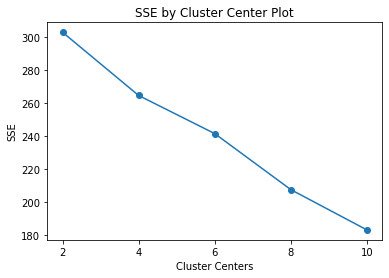

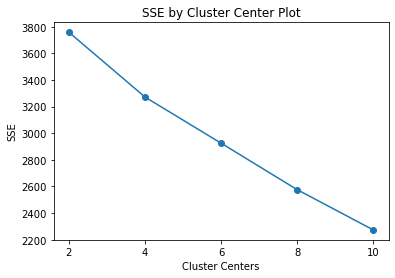

In [32]:
 def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 10)
print('----------------------------------------------------------')
find_optimal_clusters(ctext, 10)

In [33]:
clusters = MiniBatchKMeans(n_clusters=6, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

c_clusters = MiniBatchKMeans(n_clusters=6, init_size=1024, batch_size=2048, random_state=20).fit_predict(ctext)

In [34]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=1).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
# plot_tsne_pca(text, clusters)

In [35]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)
print('-----------------------------------------------')
get_top_keywords(ctext, c_clusters, count.get_feature_names(), 10)


Cluster 0
hardcore,professional,food,tv,practitioner,internet,zombie,trailblazer,alcohol,communicator

Cluster 1
pop,culture,maven,music,lifelong,advocate,media,social,lover,twitter

Cluster 2
general,teen,idol,future,beer,food,geek,passionate,problem,solver

Cluster 3
travel,bacon,creator,zombie,student,internet,incurable,thinker,fanatic,specialist

Cluster 4
baconaholic,twitter,zombie,advocate,coffee,devoted,troublemaker,hipster,friendly,fan

Cluster 5
entrepreneur,tv,music,coffee,devoted,pop,culture,enthusiast,ninja,aficionado
-----------------------------------------------

Cluster 0
teen,beer,organizer,junkie,geek,reader,passionate,solver,food,problem

Cluster 1
fanatic,entrepreneur,friendly,enthusiast,thinker,practitioner,tv,coffee,culture,pop

Cluster 2
guru,junkie,typical,practitioner,scholar,lover,internet,tv,food,twitter

Cluster 3
zombie,total,thinker,specialist,music,writer,aficionado,travel,junkie,incurable

Cluster 4
guru,scholar,trailblazer,professional,expert,communica